In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools, places,geo_tools, bloomdrivers as bd, evaltools as et
import xarray as xr
import datetime as dt
%matplotlib inline

In [2]:
# get grid corners (use 2015, pre Sept 22, 2011 and post Sept 22 2011 files)

<class 'netCDF4._netCDF4.Variable'>
float32 u_wind(time_counter, y, x)
    _FillValue: nan
    level: 10 m above surface
    long_name: U-Component of Wind
    standard_name: x_wind
    units: m/s
    ioos_category: wind speed and direction
unlimited dimensions: time_counter
current shape = (24, 266, 256)
filling on


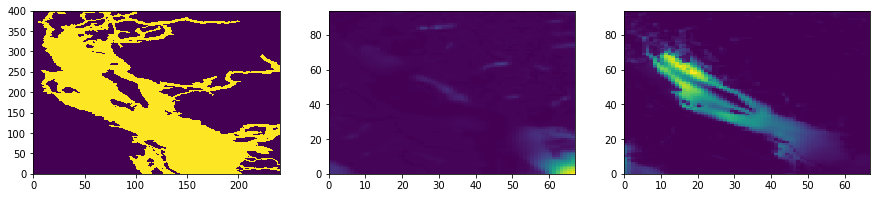

In [3]:
fig,ax=plt.subplots(1,3,figsize=(15,3))
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc') as mesh:
    navlon=mesh.variables['nav_lon'][:,:]
    navlat=mesh.variables['nav_lat'][:,:]
    tmask=mesh.variables['tmask'][0,:,:,:]
    ax[0].pcolormesh(mesh.variables['tmask'][0,0,400:800,110:350])
with nc.Dataset('/results/forcing/atmospheric/GEM2.5/operational/ops_y2015m03d01.nc') as g:
    ops_lon=g.variables['nav_lon'][:,:]
    ops_lat=g.variables['nav_lat'][:,:]
    ax[1].pcolormesh((g.variables['u_wind'][0,119:213,96:163]**2+\
                      g.variables['v_wind'][0,119:213,96:163]**2)**(3/2))
    #.pcolormesh(g.variables[])
with nc.Dataset('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2011m09d21.nc') as g: 
    gl1_lon=g.variables['nav_lon'][:,:]
    gl1_lat=g.variables['nav_lat'][:,:]
    ax[2].pcolormesh((g.variables['u_wind'][0,119:213,96:163]**2+\
                      g.variables['v_wind'][0,119:213,96:163]**2)**(3/2))
with nc.Dataset('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2011m09d22.nc') as g: 
    gl2_lon=g.variables['nav_lon'][:,:]
    gl2_lat=g.variables['nav_lat'][:,:]
    ax[2].pcolormesh((g.variables['u_wind'][0,119:213,96:163]**2+\
                      g.variables['v_wind'][0,119:213,96:163]**2)**(3/2))
    print(g.variables['u_wind'])

In [4]:
ll_lon=navlon[400,110]
lr_lon=navlon[400,350]
ul_lon=navlon[800,110]
ur_lon=navlon[800,350]
ll_lat=navlat[400,110]
lr_lat=navlat[400,350]
ul_lat=navlat[800,110]
ur_lat=navlat[800,350]

In [5]:
(ll_j_ops,ll_i_ops)=geo_tools.find_closest_model_point(ll_lon,ll_lat,ops_lon-360,ops_lat,grid='GEM2.5')
(lr_j_ops,lr_i_ops)=geo_tools.find_closest_model_point(lr_lon,lr_lat,ops_lon-360,ops_lat,grid='GEM2.5')
(ul_j_ops,ul_i_ops)=geo_tools.find_closest_model_point(ul_lon,ul_lat,ops_lon-360,ops_lat,grid='GEM2.5')
(ur_j_ops,ur_i_ops)=geo_tools.find_closest_model_point(ur_lon,ur_lat,ops_lon-360,ops_lat,grid='GEM2.5')
print((ll_j_ops,ll_i_ops),(lr_j_ops,lr_i_ops),(ul_j_ops,ul_i_ops),(ur_j_ops,ur_i_ops))

(119, 121) (134, 163) (200, 96) (213, 136)


In [6]:
(ll_j_gl1,ll_i_gl1)=geo_tools.find_closest_model_point(ll_lon,ll_lat,gl1_lon-360,gl1_lat,grid='GEM2.5')
(lr_j_gl1,lr_i_gl1)=geo_tools.find_closest_model_point(lr_lon,lr_lat,gl1_lon-360,gl2_lat,grid='GEM2.5')
(ul_j_gl1,ul_i_gl1)=geo_tools.find_closest_model_point(ul_lon,ul_lat,gl1_lon-360,gl1_lat,grid='GEM2.5')
(ur_j_gl1,ur_i_gl1)=geo_tools.find_closest_model_point(ur_lon,ur_lat,gl1_lon-360,gl1_lat,grid='GEM2.5')
print((ll_j_gl1,ll_i_gl1),(lr_j_gl1,lr_i_gl1),(ul_j_gl1,ul_i_gl1),(ur_j_gl1,ur_i_gl1))

(114, 121) (132, 161) (189, 96) (202, 134)


In [7]:
(ll_j_gl2,ll_i_gl2)=geo_tools.find_closest_model_point(ll_lon,ll_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
(lr_j_gl2,lr_i_gl2)=geo_tools.find_closest_model_point(lr_lon,lr_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
(ul_j_gl2,ul_i_gl2)=geo_tools.find_closest_model_point(ul_lon,ul_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
(ur_j_gl2,ur_i_gl2)=geo_tools.find_closest_model_point(ur_lon,ur_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
print((ll_j_gl2,ll_i_gl2),(lr_j_gl2,lr_i_gl2),(ul_j_gl2,ul_i_gl2),(ur_j_gl2,ur_i_gl2))

(117, 124) (131, 163) (193, 99) (205, 137)


In [8]:
# ops: use j: 119:213, i: 96:163
# gl1: use j: 114:202, i: 96:161
# gl2: use j: 117:205, i: 99:163

In [9]:
def getWindVars(day):
    if day>dt.datetime(2014,12,1): #or day.year>2014
        opsdir='/results/forcing/atmospheric/GEM2.5/operational/'
        nam_fmt='ops'
        jlims=(119,213)
        ilims=(96,163)
    elif day<dt.datetime(2011,9,22):
        opsdir='/results/forcing/atmospheric/GEM2.5/gemlam'
        nam_fmt='gemlam'
        jlims=(114,202)
        ilims=(96,161)
    else:
        opsdir='/results/forcing/atmospheric/GEM2.5/gemlam'
        nam_fmt='gemlam'
        jlims=(117,205)
        ilims=(99,163)
    return opsdir, nam_fmt, jlims,ilims

<ipython-input-10-bcc7bbeb2c78>:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(navlon[350:850,100:398],navlat[350:850,100:398],tmask[0,350:850,100:398],shading='auto')


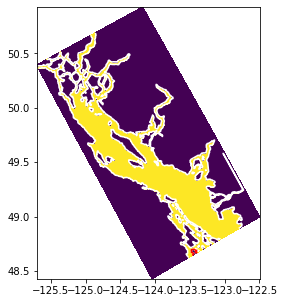

In [10]:
fig,ax=plt.subplots(1,1,figsize=(4,5))
ax.pcolormesh(navlon[350:850,100:398],navlat[350:850,100:398],tmask[0,350:850,100:398],shading='auto')
cl=ax.contour(navlon[350:850,100:398],navlat[350:850,100:398],tmask[0,350:850,100:398],[.5],colors='w')
plt.plot(cl.allsegs[0][0][:,0],cl.allsegs[0][0][:,1],'r-')

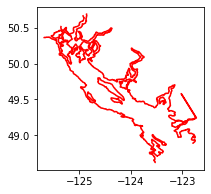

In [11]:
fig,ax=plt.subplots(1,1,figsize=(3,3))
lens=list()
modlines=list()
for ii in range(0,len(cl.allsegs[0])):
    lens.append(len(cl.allsegs[0][ii][:,1]))
    #if np.min(cl.allsegs[0][ii][:,1])<49.2 and np.max(cl.allsegs[0][ii][:,1])>50:
    if len(cl.allsegs[0][ii][:,1])>100:
        #print(ii)
        ax.plot(cl.allsegs[0][ii][:,0],cl.allsegs[0][ii][:,1],'r-')
        modlines.append((cl.allsegs[0][ii][:,0],cl.allsegs[0][ii][:,1]))

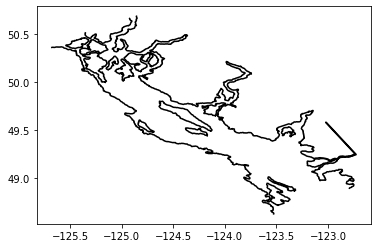

In [12]:
for (lons,lats) in modlines:
    plt.plot(lons,lats,'k-')

In [13]:
opslines=list()
for (lons,lats) in modlines:
    x=np.array([geo_tools.find_closest_model_point(lon,lat,ops_lon-360,ops_lat,grid='GEM2.5') \
                for lat, lon in zip(lats,lons)])
    opslines.append((x[:,0],x[:,1]))

In [14]:
gl1lines=list()
for (lons,lats) in modlines:
    x=np.array([geo_tools.find_closest_model_point(lon,lat,gl1_lon-360,gl1_lat,grid='GEM2.5') \
                for lat, lon in zip(lats,lons)])
    gl1lines.append((x[:,0],x[:,1]))

In [15]:
gl2lines=list()
for (lons,lats) in modlines:
    x=np.array([geo_tools.find_closest_model_point(lon,lat,gl2_lon-360,gl2_lat,grid='GEM2.5') \
                for lat, lon in zip(lats,lons)])
    gl2lines.append((x[:,0],x[:,1]))

In [16]:
# extract march mean wind from one of each type of file:
## ops, 2015
year=2015
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
U3ops=(fu**2+fv**2)**(3/2)
U3opsmean=np.mean(U3ops,0)

## gl1, 2007
year=2007
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
U3gl1=(fu**2+fv**2)**(3/2)
U3gl1mean=np.mean(U3gl1,0)

## gl2, 2012
year=2012
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
U3gl2=(fu**2+fv**2)**(3/2)
U3gl2mean=np.mean(U3gl2,0)

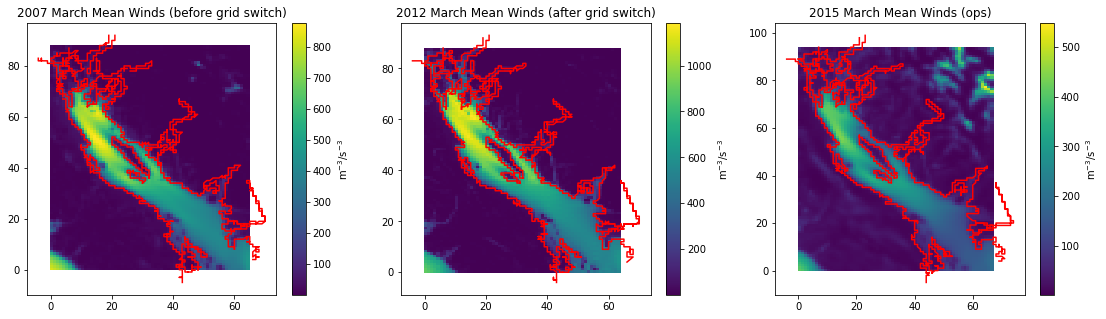

In [17]:
fig,ax=plt.subplots(1,3,figsize=(19,5))


iax=ax[0]
iax.set_title('2007 March Mean Winds (before grid switch)')
m=iax.pcolormesh(U3gl1mean)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
for (jj,ii) in gl1lines:
    iax.plot(ii-96,jj-114,'r-')

iax=ax[1]
iax.set_title('2012 March Mean Winds (after grid switch)')
m=iax.pcolormesh(U3gl2mean)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
for (jj,ii) in gl2lines:
    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[2]
iax.set_title('2015 March Mean Winds (ops)')
m=iax.pcolormesh(U3opsmean)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
for (jj,ii) in opslines:
    iax.plot(ii-96,jj-119,'r-')


## January

In [18]:
# extract march mean wind from one of each type of file:

## gl1, 2007
#year=2007
#day=dt.datetime(year,1,1)
#opsdir, namfmt, jlims, ilims = getWindVars(day)
#flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
#                           flen=1,ftype='None',tres=24);
#fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
#fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
#fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
#gl12007=(fu**2+fv**2)**(3/2)
#margl12007mean=np.mean(gl12007,0)

## gl1, 2008
year=2008
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_gl12008=(fu**2+fv**2)**(3/2)
jan_gl12008mean=np.mean(jan_gl12008,0)

## gl1, 2007
year=2009
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_gl12009=(fu**2+fv**2)**(3/2)
jan_gl12009mean=np.mean(jan_gl12009,0)

## gl1, 2007
year=2010
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_gl12010=(fu**2+fv**2)**(3/2)
jan_gl12010mean=np.mean(jan_gl12010,0)

## gl1, 2007
year=2011
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_gl12011=(fu**2+fv**2)**(3/2)
jan_gl12011mean=np.mean(jan_gl12011,0)

## gl1, 2007
year=2012
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_gl22012=(fu**2+fv**2)**(3/2)
jan_gl22012mean=np.mean(jan_gl22012,0)

## gl1, 2007
year=2013
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_gl22013=(fu**2+fv**2)**(3/2)
jan_gl22013mean=np.mean(jan_gl22013,0)

## gl1, 2007
year=2014
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_gl22014=(fu**2+fv**2)**(3/2)
jan_gl22014mean=np.mean(jan_gl22014,0)

## gl1, 2007
year=2015
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ops2015=(fu**2+fv**2)**(3/2)
jan_ops2015mean=np.mean(jan_ops2015,0)

## ops, 2015
year=2016
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ops2016=(fu**2+fv**2)**(3/2)
jan_ops2016mean=np.mean(jan_ops2016,0)

## gl1, 2007
year=2017
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ops2017=(fu**2+fv**2)**(3/2)
jan_ops2017mean=np.mean(jan_ops2017,0)

## gl1, 2007
year=2018
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ops2018=(fu**2+fv**2)**(3/2)
jan_ops2018mean=np.mean(jan_ops2018,0)

## gl1, 2007
year=2019
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ops2019=(fu**2+fv**2)**(3/2)
jan_ops2019mean=np.mean(jan_ops2019,0)

## gl1, 2007
year=2020
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ops2020=(fu**2+fv**2)**(3/2)
jan_ops2020mean=np.mean(jan_ops2020,0)

In [19]:
#Jan2007=np.nanmean(jan_gl12007mean)
Jan2008=np.nanmean(jan_gl12008mean)
Jan2009=np.nanmean(jan_gl12009mean)
Jan2010=np.nanmean(jan_gl12010mean)
Jan2011=np.nanmean(jan_gl12011mean)
Jan2012=np.nanmean(jan_gl22012mean)
Jan2013=np.nanmean(jan_gl22013mean)
Jan2014=np.nanmean(jan_gl22014mean)
Jan2015=np.nanmean(jan_ops2015mean)
Jan2016=np.nanmean(jan_ops2016mean)
Jan2017=np.nanmean(jan_ops2017mean)
Jan2018=np.nanmean(jan_ops2018mean)
Jan2019=np.nanmean(jan_ops2019mean)
Jan2020=np.nanmean(jan_ops2020mean)

Text(0.5, 0.98, 'January Mean Wind Speed')

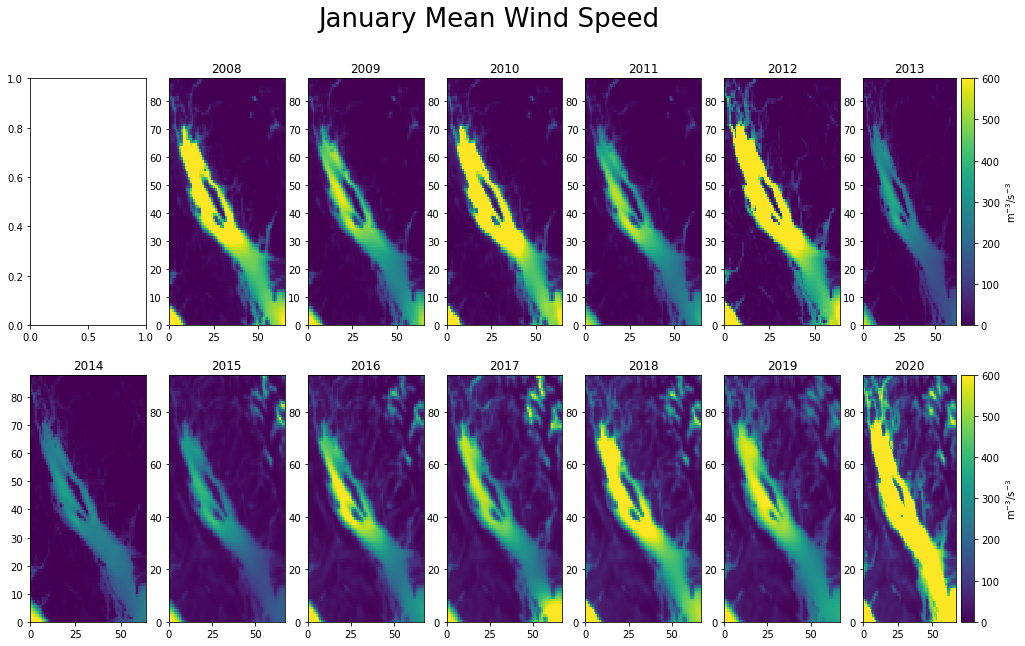

In [20]:
### January winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=600

#iax=ax[0,0]
#iax.set_title('2007')
#m=iax.pcolormesh(margl12007mean)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(jan_gl12008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(jan_gl12009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(jan_gl12010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(jan_gl12011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(jan_gl22012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(jan_gl22013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(jan_gl22014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(jan_ops2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(jan_ops2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(jan_ops2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(jan_ops2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(jan_ops2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(jan_ops2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('January Mean Wind Speed',fontsize=26)

#### There's something wrong with the 2014 grid - check this
#### Fixed by switching the 2014 files to gl2 (grid switch to ops occurred in 12/01/2014 - confirm this).

## February

In [21]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_gl12007=(fu**2+fv**2)**(3/2)
feb_gl12007mean=np.mean(feb_gl12007,0)


year=2008
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,29),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_gl12008=(fu**2+fv**2)**(3/2)
feb_gl12008mean=np.mean(feb_gl12008,0)


year=2009
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_gl12009=(fu**2+fv**2)**(3/2)
feb_gl12009mean=np.mean(feb_gl12009,0)


year=2010
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_gl12010=(fu**2+fv**2)**(3/2)
feb_gl12010mean=np.mean(feb_gl12010,0)


year=2011
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_gl12011=(fu**2+fv**2)**(3/2)
feb_gl12011mean=np.mean(feb_gl12011,0)


year=2012
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,29),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_gl22012=(fu**2+fv**2)**(3/2)
feb_gl22012mean=np.mean(feb_gl22012,0)


year=2013
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_gl22013=(fu**2+fv**2)**(3/2)
feb_gl22013mean=np.mean(feb_gl22013,0)


year=2014
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_gl22014=(fu**2+fv**2)**(3/2)
feb_gl22014mean=np.mean(feb_gl22014,0)


year=2015
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ops2015=(fu**2+fv**2)**(3/2)
feb_ops2015mean=np.mean(feb_ops2015,0)


year=2016
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,29),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ops2016=(fu**2+fv**2)**(3/2)
feb_ops2016mean=np.mean(feb_ops2016,0)


year=2017
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ops2017=(fu**2+fv**2)**(3/2)
feb_ops2017mean=np.mean(feb_ops2017,0)


year=2018
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ops2018=(fu**2+fv**2)**(3/2)
feb_ops2018mean=np.mean(feb_ops2018,0)


year=2019
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ops2019=(fu**2+fv**2)**(3/2)
feb_ops2019mean=np.mean(feb_ops2019,0)


year=2020
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,29),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ops2020=(fu**2+fv**2)**(3/2)
feb_ops2020mean=np.mean(feb_ops2020,0)

In [22]:
Feb2007=np.nanmean(feb_gl12007mean)
Feb2008=np.nanmean(feb_gl12008mean)
Feb2009=np.nanmean(feb_gl12009mean)
Feb2010=np.nanmean(feb_gl12010mean)
Feb2011=np.nanmean(feb_gl12011mean)
Feb2012=np.nanmean(feb_gl22012mean)
Feb2013=np.nanmean(feb_gl22013mean)
Feb2014=np.nanmean(feb_gl22014mean)
Feb2015=np.nanmean(feb_ops2015mean)
Feb2016=np.nanmean(feb_ops2016mean)
Feb2017=np.nanmean(feb_ops2017mean)
Feb2018=np.nanmean(feb_ops2018mean)
Feb2019=np.nanmean(feb_ops2019mean)
Feb2020=np.nanmean(feb_ops2020mean)

In [23]:
print(Feb2007, Feb2008,Feb2009,Feb2010,Feb2011,Feb2012,Feb2013,Feb2014,Feb2015,Feb2016,Feb2017,Feb2018,Feb2019,Feb2020)

80.61128 56.089367 51.20007 82.98528 105.72561 115.78692 88.95578 90.00871 59.27345 89.41459 82.55338 71.7138 122.67487 96.71373


Text(0.5, 0.98, 'February Mean Wind Speed')

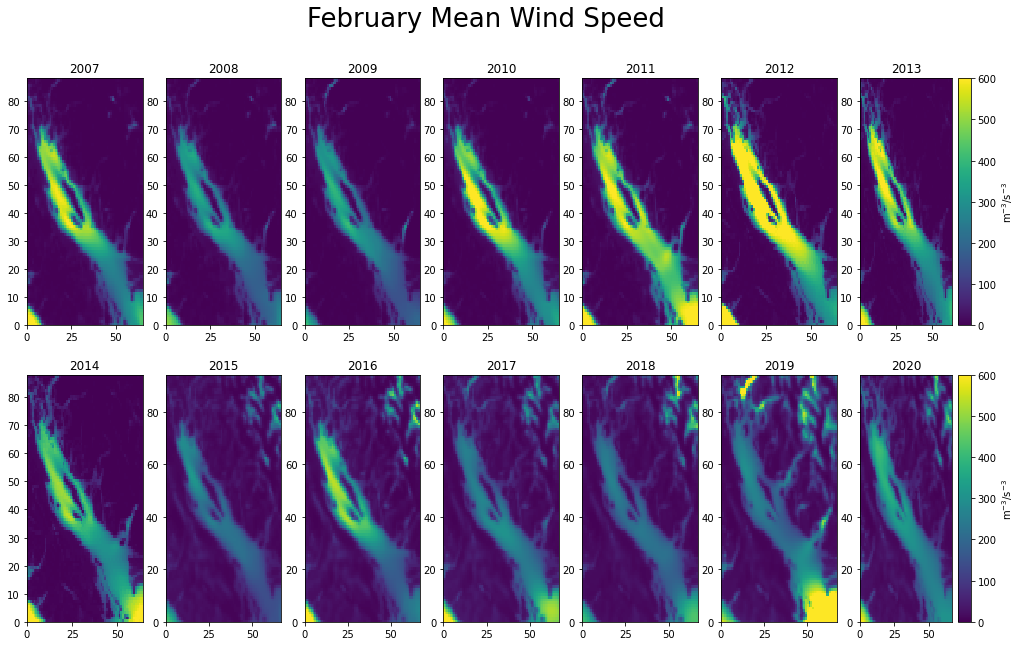

In [24]:
### February winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=600

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(feb_gl12007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(feb_gl12008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(feb_gl12009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(feb_gl12010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(feb_gl12011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(feb_gl22012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(feb_gl22013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(feb_gl22014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(feb_ops2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(feb_ops2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(feb_ops2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(feb_ops2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(feb_ops2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(feb_ops2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('February Mean Wind Speed',fontsize=26)

## March

In [25]:
# extract march mean wind from one of each type of file:

## gl1, 2007
year=2007
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_gl12007=(fu**2+fv**2)**(3/2)
mar_gl12007mean=np.mean(mar_gl12007,0)

## gl1, 2008
year=2008
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_gl12008=(fu**2+fv**2)**(3/2)
mar_gl12008mean=np.mean(mar_gl12008,0)

## gl1, 2007
year=2009
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_gl12009=(fu**2+fv**2)**(3/2)
mar_gl12009mean=np.mean(mar_gl12009,0)

## gl1, 2007
year=2010
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_gl12010=(fu**2+fv**2)**(3/2)
mar_gl12010mean=np.mean(mar_gl12010,0)

## gl1, 2007
year=2011
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_gl12011=(fu**2+fv**2)**(3/2)
mar_gl12011mean=np.mean(mar_gl12011,0)

## gl1, 2007
year=2012
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_gl22012=(fu**2+fv**2)**(3/2)
mar_gl22012mean=np.mean(mar_gl22012,0)

## gl1, 2007
year=2013
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_gl22013=(fu**2+fv**2)**(3/2)
mar_gl22013mean=np.mean(mar_gl22013,0)

## gl1, 2007
year=2014
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_gl22014=(fu**2+fv**2)**(3/2)
mar_gl22014mean=np.mean(mar_gl22014,0)

## gl1, 2007
year=2015
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ops2015=(fu**2+fv**2)**(3/2)
mar_ops2015mean=np.mean(mar_ops2015,0)

## ops, 2015
year=2016
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ops2016=(fu**2+fv**2)**(3/2)
mar_ops2016mean=np.mean(mar_ops2016,0)

## gl1, 2007
year=2017
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ops2017=(fu**2+fv**2)**(3/2)
mar_ops2017mean=np.mean(mar_ops2017,0)

## gl1, 2007
year=2018
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ops2018=(fu**2+fv**2)**(3/2)
mar_ops2018mean=np.mean(mar_ops2018,0)

## gl1, 2007
year=2019
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ops2019=(fu**2+fv**2)**(3/2)
mar_ops2019mean=np.mean(mar_ops2019,0)

## gl1, 2007
year=2020
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ops2020=(fu**2+fv**2)**(3/2)
mar_ops2020mean=np.mean(mar_ops2020,0)


In [26]:
Mar2007=np.nanmean(mar_gl12007mean)
Mar2008=np.nanmean(mar_gl12008mean)
Mar2009=np.nanmean(mar_gl12009mean)
Mar2010=np.nanmean(mar_gl12010mean)
Mar2011=np.nanmean(mar_gl12011mean)
Mar2012=np.nanmean(mar_gl22012mean)
Mar2013=np.nanmean(mar_gl22013mean)
Mar2014=np.nanmean(mar_gl22014mean)
Mar2015=np.nanmean(mar_ops2015mean)
Mar2016=np.nanmean(mar_ops2016mean)
Mar2017=np.nanmean(mar_ops2017mean)
Mar2018=np.nanmean(mar_ops2018mean)
Mar2019=np.nanmean(mar_ops2019mean)
Mar2020=np.nanmean(mar_ops2020mean)

Text(0.5, 0.98, 'March Mean Wind Speed')

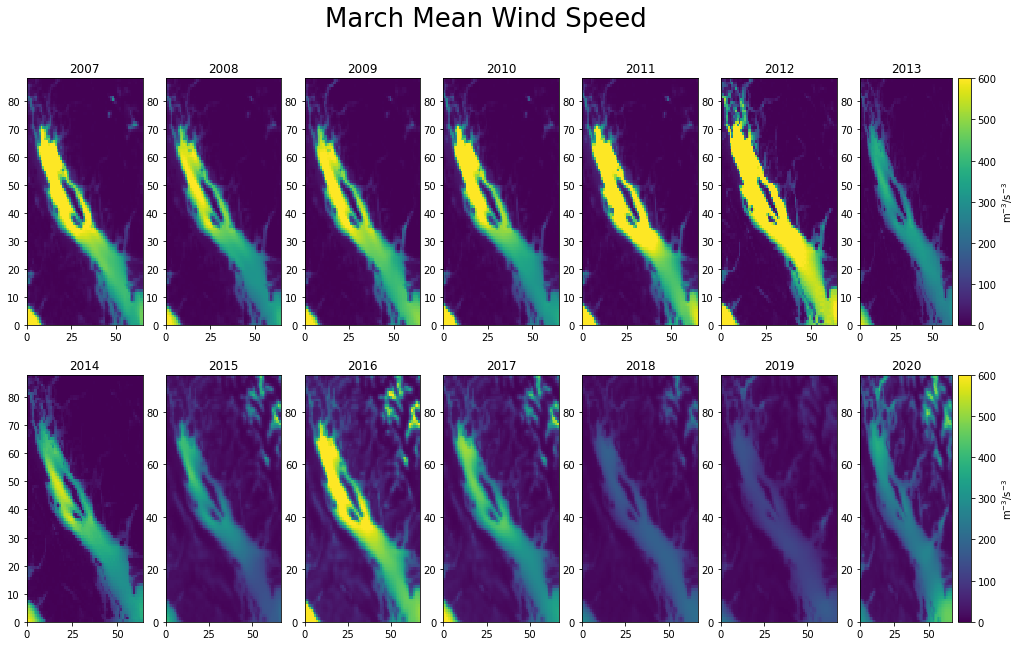

In [27]:
### March winds
fig,ax=plt.subplots(2,7,figsize=(17,10))

vmin=0
vmax=600

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(mar_gl12007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(mar_gl12008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(mar_gl12009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(mar_gl12010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(mar_gl12011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(mar_gl22012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(mar_gl22013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(mar_gl22014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(mar_ops2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(mar_ops2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(mar_ops2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(mar_ops2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(mar_ops2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(mar_ops2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('March Mean Wind Speed',fontsize=26)

## April

In [28]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_gl12007=(fu**2+fv**2)**(3/2)
apr_gl12007mean=np.mean(apr_gl12007,0)


year=2008
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_gl12008=(fu**2+fv**2)**(3/2)
apr_gl12008mean=np.mean(apr_gl12008,0)


year=2009
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_gl12009=(fu**2+fv**2)**(3/2)
apr_gl12009mean=np.mean(apr_gl12009,0)


year=2010
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_gl12010=(fu**2+fv**2)**(3/2)
apr_gl12010mean=np.mean(apr_gl12010,0)


year=2011
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_gl12011=(fu**2+fv**2)**(3/2)
apr_gl12011mean=np.mean(apr_gl12011,0)


year=2012
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_gl22012=(fu**2+fv**2)**(3/2)
apr_gl22012mean=np.mean(apr_gl22012,0)


year=2013
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_gl22013=(fu**2+fv**2)**(3/2)
apr_gl22013mean=np.mean(apr_gl22013,0)


year=2014
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_gl22014=(fu**2+fv**2)**(3/2)
apr_gl22014mean=np.mean(apr_gl22014,0)


year=2015
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ops2015=(fu**2+fv**2)**(3/2)
apr_ops2015mean=np.mean(apr_ops2015,0)


year=2016
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ops2016=(fu**2+fv**2)**(3/2)
apr_ops2016mean=np.mean(apr_ops2016,0)


year=2017
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ops2017=(fu**2+fv**2)**(3/2)
apr_ops2017mean=np.mean(apr_ops2017,0)


year=2018
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ops2018=(fu**2+fv**2)**(3/2)
apr_ops2018mean=np.mean(apr_ops2018,0)


year=2019
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ops2019=(fu**2+fv**2)**(3/2)
apr_ops2019mean=np.mean(apr_ops2019,0)


year=2020
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ops2020=(fu**2+fv**2)**(3/2)
apr_ops2020mean=np.mean(apr_ops2020,0)

Text(0.5, 0.98, 'April Mean Wind Speed')

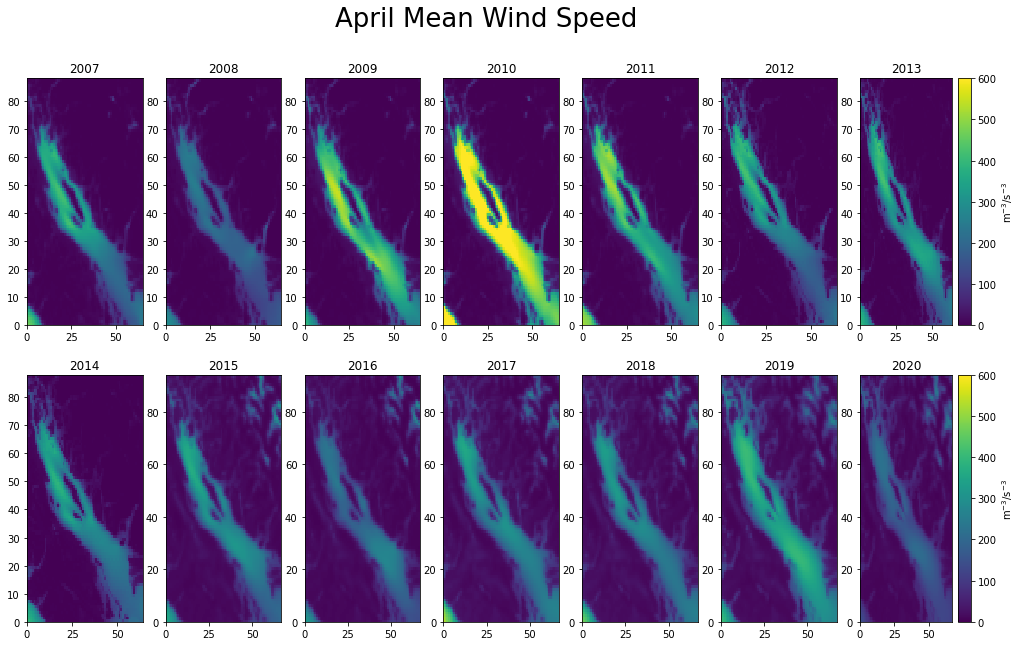

In [29]:
### April winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=600

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(apr_gl12007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(apr_gl12008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(apr_gl12009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(apr_gl12010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(apr_gl12011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(apr_gl22012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(apr_gl22013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(apr_gl22014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(apr_ops2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(apr_ops2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(apr_ops2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(apr_ops2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(apr_ops2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(apr_ops2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('April Mean Wind Speed',fontsize=26)

In [30]:
Apr2007=np.nanmean(apr_gl12007mean)
Apr2008=np.nanmean(apr_gl12008mean)
Apr2009=np.nanmean(apr_gl12009mean)
Apr2010=np.nanmean(apr_gl12010mean)
Apr2011=np.nanmean(apr_gl12011mean)
Apr2012=np.nanmean(apr_gl22012mean)
Apr2013=np.nanmean(apr_gl22013mean)
Apr2014=np.nanmean(apr_gl22014mean)
Apr2015=np.nanmean(apr_ops2015mean)
Apr2016=np.nanmean(apr_ops2016mean)
Apr2017=np.nanmean(apr_ops2017mean)
Apr2018=np.nanmean(apr_ops2018mean)
Apr2019=np.nanmean(apr_ops2019mean)
Apr2020=np.nanmean(apr_ops2020mean)

## May

In [31]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_gl12007=(fu**2+fv**2)**(3/2)
may_gl12007mean=np.mean(may_gl12007,0)


year=2008
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_gl12008=(fu**2+fv**2)**(3/2)
may_gl12008mean=np.mean(may_gl12008,0)


year=2009
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_gl12009=(fu**2+fv**2)**(3/2)
may_gl12009mean=np.mean(may_gl12009,0)


year=2010
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_gl12010=(fu**2+fv**2)**(3/2)
may_gl12010mean=np.mean(may_gl12010,0)


year=2011
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_gl12011=(fu**2+fv**2)**(3/2)
may_gl12011mean=np.mean(may_gl12011,0)


year=2012
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_gl22012=(fu**2+fv**2)**(3/2)
may_gl22012mean=np.mean(may_gl22012,0)


year=2013
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_gl22013=(fu**2+fv**2)**(3/2)
may_gl22013mean=np.mean(may_gl22013,0)


year=2014
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_gl22014=(fu**2+fv**2)**(3/2)
may_gl22014mean=np.mean(may_gl22014,0)


year=2015
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ops2015=(fu**2+fv**2)**(3/2)
may_ops2015mean=np.mean(may_ops2015,0)


year=2016
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ops2016=(fu**2+fv**2)**(3/2)
may_ops2016mean=np.mean(may_ops2016,0)


year=2017
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ops2017=(fu**2+fv**2)**(3/2)
may_ops2017mean=np.mean(may_ops2017,0)


year=2018
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ops2018=(fu**2+fv**2)**(3/2)
may_ops2018mean=np.mean(may_ops2018,0)


year=2019
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ops2019=(fu**2+fv**2)**(3/2)
may_ops2019mean=np.mean(may_ops2019,0)


year=2020
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ops2020=(fu**2+fv**2)**(3/2)
may_ops2020mean=np.mean(may_ops2020,0)

Text(0.5, 0.98, 'May Mean Wind Speed')

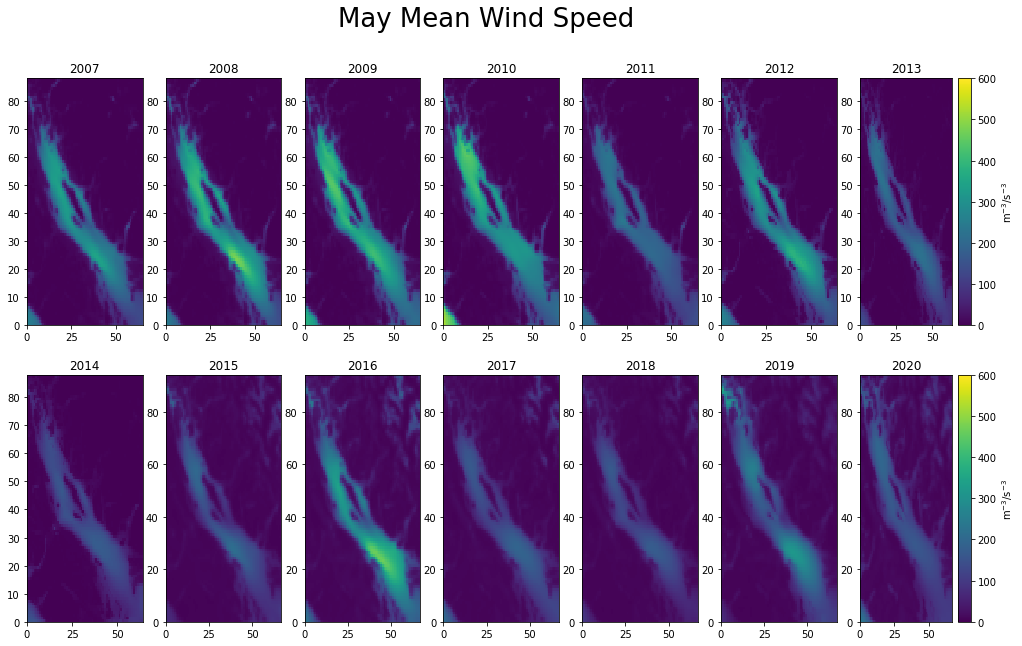

In [32]:
### May winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=600

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(may_gl12007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(may_gl12008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(may_gl12009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(may_gl12010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(may_gl12011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(may_gl22012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(may_gl22013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(may_gl22014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(may_ops2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(may_ops2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(may_ops2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(may_ops2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(may_ops2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(may_ops2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('May Mean Wind Speed',fontsize=26)

In [33]:
May2007=np.nanmean(may_gl12007mean)
May2008=np.nanmean(may_gl12008mean)
May2009=np.nanmean(may_gl12009mean)
May2010=np.nanmean(may_gl12010mean)
May2011=np.nanmean(may_gl12011mean)
May2012=np.nanmean(may_gl22012mean)
May2013=np.nanmean(may_gl22013mean)
May2014=np.nanmean(may_gl22014mean)
May2015=np.nanmean(may_ops2015mean)
May2016=np.nanmean(may_ops2016mean)
May2017=np.nanmean(may_ops2017mean)
May2018=np.nanmean(may_ops2018mean)
May2019=np.nanmean(may_ops2019mean)
May2020=np.nanmean(may_ops2020mean)

## June

In [34]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_gl12007=(fu**2+fv**2)**(3/2)
jun_gl12007mean=np.mean(jun_gl12007,0)


year=2008
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_gl12008=(fu**2+fv**2)**(3/2)
jun_gl12008mean=np.mean(jun_gl12008,0)


year=2009
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_gl12009=(fu**2+fv**2)**(3/2)
jun_gl12009mean=np.mean(jun_gl12009,0)


year=2010
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_gl12010=(fu**2+fv**2)**(3/2)
jun_gl12010mean=np.mean(jun_gl12010,0)


year=2011
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_gl12011=(fu**2+fv**2)**(3/2)
jun_gl12011mean=np.mean(jun_gl12011,0)


year=2012
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_gl22012=(fu**2+fv**2)**(3/2)
jun_gl22012mean=np.mean(jun_gl22012,0)


year=2013
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_gl22013=(fu**2+fv**2)**(3/2)
jun_gl22013mean=np.mean(jun_gl22013,0)


year=2014
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_gl22014=(fu**2+fv**2)**(3/2)
jun_gl22014mean=np.mean(jun_gl22014,0)


year=2015
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ops2015=(fu**2+fv**2)**(3/2)
jun_ops2015mean=np.mean(jun_ops2015,0)


year=2016
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ops2016=(fu**2+fv**2)**(3/2)
jun_ops2016mean=np.mean(jun_ops2016,0)


year=2017
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ops2017=(fu**2+fv**2)**(3/2)
jun_ops2017mean=np.mean(jun_ops2017,0)


year=2018
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ops2018=(fu**2+fv**2)**(3/2)
jun_ops2018mean=np.mean(jun_ops2018,0)


year=2019
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ops2019=(fu**2+fv**2)**(3/2)
jun_ops2019mean=np.mean(jun_ops2019,0)


year=2020
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ops2020=(fu**2+fv**2)**(3/2)
jun_ops2020mean=np.mean(jun_ops2020,0)

Text(0.5, 0.98, 'June Mean Wind Speed')

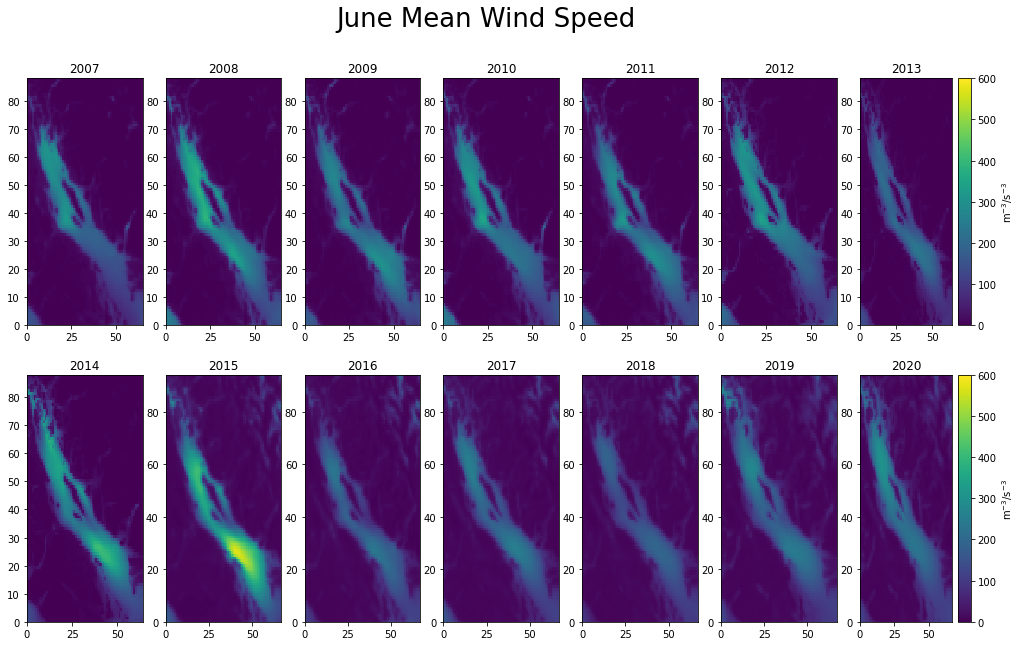

In [35]:
### June winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=600

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(jun_gl12007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(jun_gl12008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(jun_gl12009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(jun_gl12010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(jun_gl12011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(jun_gl22012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(jun_gl22013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(jun_gl22014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(jun_ops2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(jun_ops2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(jun_ops2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(jun_ops2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(jun_ops2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(jun_ops2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('June Mean Wind Speed',fontsize=26)

In [36]:
Jun2007=np.nanmean(jun_gl12007mean)
Jun2008=np.nanmean(jun_gl12008mean)
Jun2009=np.nanmean(jun_gl12009mean)
Jun2010=np.nanmean(jun_gl12010mean)
Jun2011=np.nanmean(jun_gl12011mean)
Jun2012=np.nanmean(jun_gl22012mean)
Jun2013=np.nanmean(jun_gl22013mean)
Jun2014=np.nanmean(jun_gl22014mean)
Jun2015=np.nanmean(jun_ops2015mean)
Jun2016=np.nanmean(jun_ops2016mean)
Jun2017=np.nanmean(jun_ops2017mean)
Jun2018=np.nanmean(jun_ops2018mean)
Jun2019=np.nanmean(jun_ops2019mean)
Jun2020=np.nanmean(jun_ops2020mean)

## July

In [37]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_gl12007=(fu**2+fv**2)**(3/2)
jul_gl12007mean=np.mean(jul_gl12007,0)


year=2008
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_gl12008=(fu**2+fv**2)**(3/2)
jul_gl12008mean=np.mean(jul_gl12008,0)


year=2009
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_gl12009=(fu**2+fv**2)**(3/2)
jul_gl12009mean=np.mean(jul_gl12009,0)


year=2010
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_gl12010=(fu**2+fv**2)**(3/2)
jul_gl12010mean=np.mean(jul_gl12010,0)


year=2011
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_gl12011=(fu**2+fv**2)**(3/2)
jul_gl12011mean=np.mean(jul_gl12011,0)


year=2012
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_gl22012=(fu**2+fv**2)**(3/2)
jul_gl22012mean=np.mean(jul_gl22012,0)


year=2013
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_gl22013=(fu**2+fv**2)**(3/2)
jul_gl22013mean=np.mean(jul_gl22013,0)


year=2014
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_gl22014=(fu**2+fv**2)**(3/2)
jul_gl22014mean=np.mean(jul_gl22014,0)


year=2015
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ops2015=(fu**2+fv**2)**(3/2)
jul_ops2015mean=np.mean(jul_ops2015,0)


year=2016
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ops2016=(fu**2+fv**2)**(3/2)
jul_ops2016mean=np.mean(jul_ops2016,0)


year=2017
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ops2017=(fu**2+fv**2)**(3/2)
jul_ops2017mean=np.mean(jul_ops2017,0)


year=2018
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ops2018=(fu**2+fv**2)**(3/2)
jul_ops2018mean=np.mean(jul_ops2018,0)


year=2019
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ops2019=(fu**2+fv**2)**(3/2)
jul_ops2019mean=np.mean(jul_ops2019,0)


year=2020
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ops2020=(fu**2+fv**2)**(3/2)
jul_ops2020mean=np.mean(jul_ops2020,0)

Text(0.5, 0.98, 'July Mean Wind Speed')

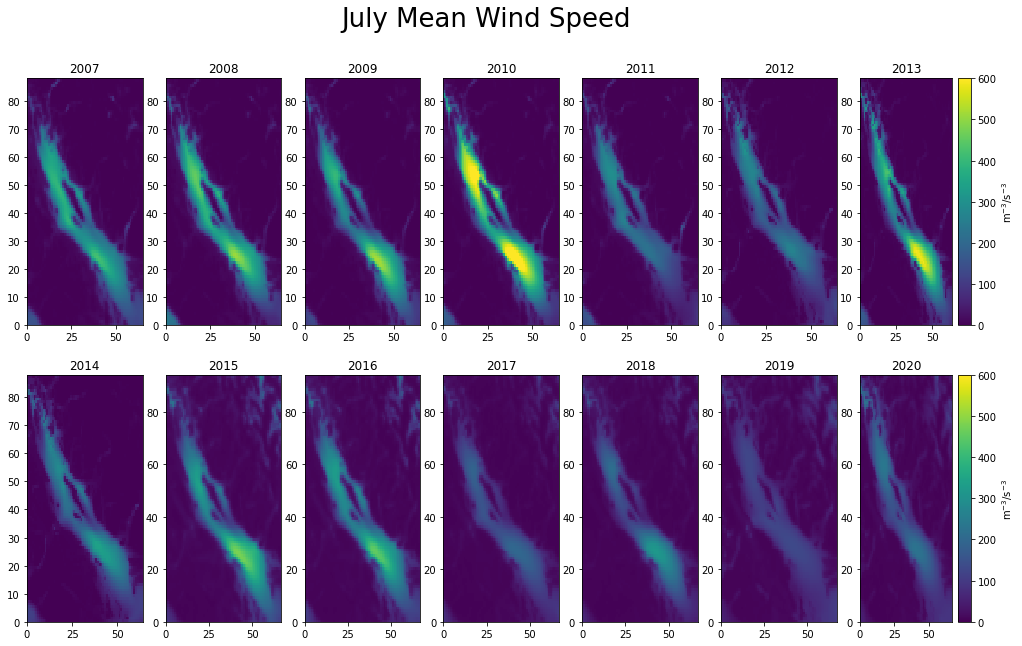

In [38]:
### July winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=600

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(jul_gl12007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(jul_gl12008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(jul_gl12009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(jul_gl12010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(jul_gl12011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(jul_gl22012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(jul_gl22013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(jul_gl22014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(jul_ops2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(jul_ops2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(jul_ops2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(jul_ops2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(jul_ops2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(jul_ops2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('July Mean Wind Speed',fontsize=26)

In [39]:
Jul2007=np.nanmean(jul_gl12007mean)
Jul2008=np.nanmean(jul_gl12008mean)
Jul2009=np.nanmean(jul_gl12009mean)
Jul2010=np.nanmean(jul_gl12010mean)
Jul2011=np.nanmean(jul_gl12011mean)
Jul2012=np.nanmean(jul_gl22012mean)
Jul2013=np.nanmean(jul_gl22013mean)
Jul2014=np.nanmean(jul_gl22014mean)
Jul2015=np.nanmean(jul_ops2015mean)
Jul2016=np.nanmean(jul_ops2016mean)
Jul2017=np.nanmean(jul_ops2017mean)
Jul2018=np.nanmean(jul_ops2018mean)
Jul2019=np.nanmean(jul_ops2019mean)
Jul2020=np.nanmean(jul_ops2020mean)

## August

In [40]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_gl12007=(fu**2+fv**2)**(3/2)
aug_gl12007mean=np.mean(aug_gl12007,0)


year=2008
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_gl12008=(fu**2+fv**2)**(3/2)
aug_gl12008mean=np.mean(aug_gl12008,0)


year=2009
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_gl12009=(fu**2+fv**2)**(3/2)
aug_gl12009mean=np.mean(aug_gl12009,0)


year=2010
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_gl12010=(fu**2+fv**2)**(3/2)
aug_gl12010mean=np.mean(aug_gl12010,0)


year=2011
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_gl12011=(fu**2+fv**2)**(3/2)
aug_gl12011mean=np.mean(aug_gl12011,0)


year=2012
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_gl22012=(fu**2+fv**2)**(3/2)
aug_gl22012mean=np.mean(aug_gl22012,0)


year=2013
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_gl22013=(fu**2+fv**2)**(3/2)
aug_gl22013mean=np.mean(aug_gl22013,0)


year=2014
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_gl22014=(fu**2+fv**2)**(3/2)
aug_gl22014mean=np.mean(aug_gl22014,0)


year=2015
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ops2015=(fu**2+fv**2)**(3/2)
aug_ops2015mean=np.mean(aug_ops2015,0)


year=2016
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ops2016=(fu**2+fv**2)**(3/2)
aug_ops2016mean=np.mean(aug_ops2016,0)


year=2017
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ops2017=(fu**2+fv**2)**(3/2)
aug_ops2017mean=np.mean(aug_ops2017,0)


year=2018
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ops2018=(fu**2+fv**2)**(3/2)
aug_ops2018mean=np.mean(aug_ops2018,0)


year=2019
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ops2019=(fu**2+fv**2)**(3/2)
aug_ops2019mean=np.mean(aug_ops2019,0)


year=2020
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ops2020=(fu**2+fv**2)**(3/2)
aug_ops2020mean=np.mean(aug_ops2020,0)

Text(0.5, 0.98, 'August Mean Wind Speed')

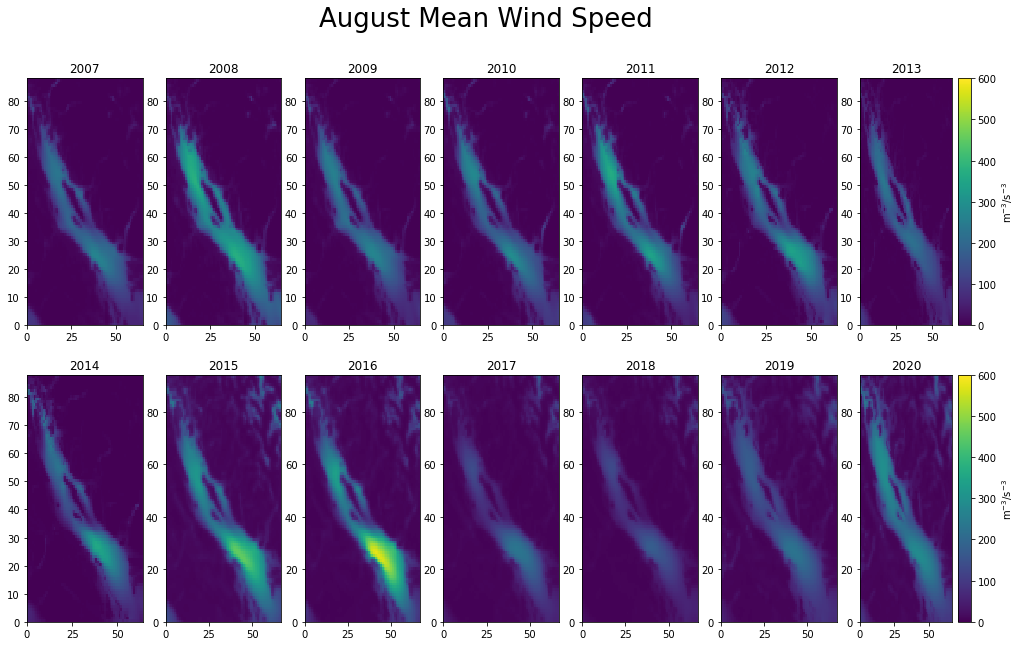

In [41]:
### August winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=600

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(aug_gl12007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(aug_gl12008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(aug_gl12009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(aug_gl12010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(aug_gl12011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(aug_gl22012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(aug_gl22013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(aug_gl22014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(aug_ops2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(aug_ops2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(aug_ops2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(aug_ops2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(aug_ops2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(aug_ops2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('August Mean Wind Speed',fontsize=26)

In [42]:
Aug2007=np.nanmean(aug_gl12007mean)
Aug2008=np.nanmean(aug_gl12008mean)
Aug2009=np.nanmean(aug_gl12009mean)
Aug2010=np.nanmean(aug_gl12010mean)
Aug2011=np.nanmean(aug_gl12011mean)
Aug2012=np.nanmean(aug_gl22012mean)
Aug2013=np.nanmean(aug_gl22013mean)
Aug2014=np.nanmean(aug_gl22014mean)
Aug2015=np.nanmean(aug_ops2015mean)
Aug2016=np.nanmean(aug_ops2016mean)
Aug2017=np.nanmean(aug_ops2017mean)
Aug2018=np.nanmean(aug_ops2018mean)
Aug2019=np.nanmean(aug_ops2019mean)
Aug2020=np.nanmean(aug_ops2020mean)

## September

In [43]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_gl12007=(fu**2+fv**2)**(3/2)
sep_gl12007mean=np.mean(sep_gl12007,0)


year=2008
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_gl12008=(fu**2+fv**2)**(3/2)
sep_gl12008mean=np.mean(sep_gl12008,0)


year=2009
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_gl12009=(fu**2+fv**2)**(3/2)
sep_gl12009mean=np.mean(sep_gl12009,0)


year=2010
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_gl12010=(fu**2+fv**2)**(3/2)
sep_gl12010mean=np.mean(sep_gl12010,0)


year=2011
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_gl12011=(fu**2+fv**2)**(3/2)
sep_gl12011mean=np.mean(sep_gl12011,0)


year=2012
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_gl22012=(fu**2+fv**2)**(3/2)
sep_gl22012mean=np.mean(sep_gl22012,0)


year=2013
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_gl22013=(fu**2+fv**2)**(3/2)
sep_gl22013mean=np.mean(sep_gl22013,0)


year=2014
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_gl22014=(fu**2+fv**2)**(3/2)
sep_gl22014mean=np.mean(sep_gl22014,0)


year=2015
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ops2015=(fu**2+fv**2)**(3/2)
sep_ops2015mean=np.mean(sep_ops2015,0)


year=2016
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ops2016=(fu**2+fv**2)**(3/2)
sep_ops2016mean=np.mean(sep_ops2016,0)


year=2017
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ops2017=(fu**2+fv**2)**(3/2)
sep_ops2017mean=np.mean(sep_ops2017,0)


year=2018
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ops2018=(fu**2+fv**2)**(3/2)
sep_ops2018mean=np.mean(sep_ops2018,0)


year=2019
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ops2019=(fu**2+fv**2)**(3/2)
sep_ops2019mean=np.mean(sep_ops2019,0)


year=2020
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ops2020=(fu**2+fv**2)**(3/2)
sep_ops2020mean=np.mean(sep_ops2020,0)

Text(0.5, 0.98, 'September Mean Wind Speed')

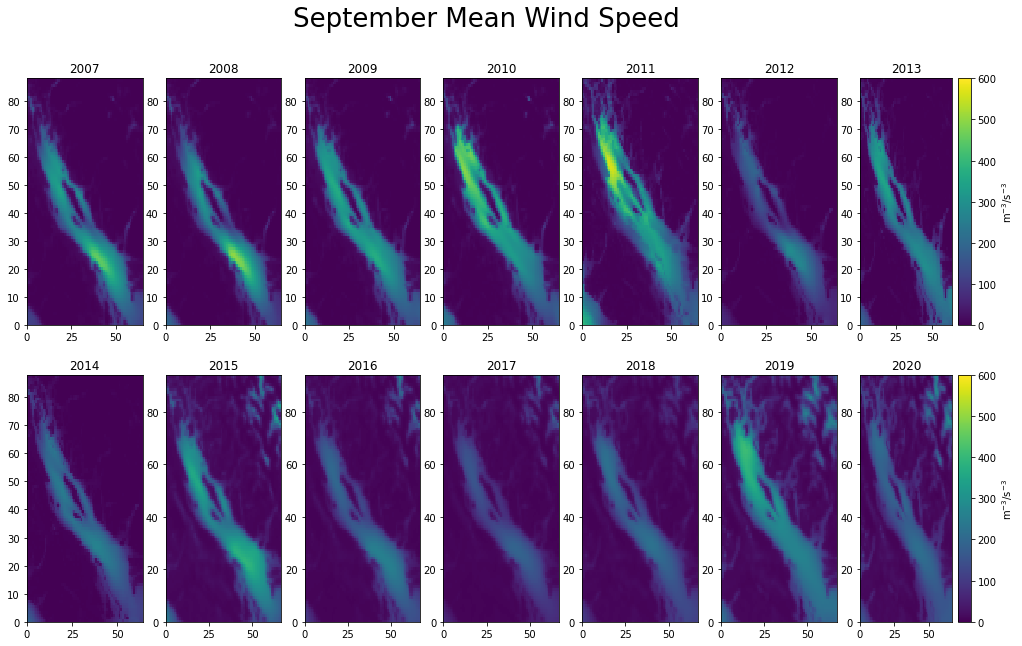

In [44]:
### September winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=600

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(sep_gl12007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(sep_gl12008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(sep_gl12009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(sep_gl12010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(sep_gl12011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(sep_gl22012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(sep_gl22013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(sep_gl22014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(sep_ops2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(sep_ops2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(sep_ops2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(sep_ops2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(sep_ops2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(sep_ops2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('September Mean Wind Speed',fontsize=26)

In [45]:
Sep2007=np.nanmean(sep_gl12007mean)
Sep2008=np.nanmean(sep_gl12008mean)
Sep2009=np.nanmean(sep_gl12009mean)
Sep2010=np.nanmean(sep_gl12010mean)
Sep2011=np.nanmean(sep_gl12011mean)
Sep2012=np.nanmean(sep_gl22012mean)
Sep2013=np.nanmean(sep_gl22013mean)
Sep2014=np.nanmean(sep_gl22014mean)
Sep2015=np.nanmean(sep_ops2015mean)
Sep2016=np.nanmean(sep_ops2016mean)
Sep2017=np.nanmean(sep_ops2017mean)
Sep2018=np.nanmean(sep_ops2018mean)
Sep2019=np.nanmean(sep_ops2019mean)
Sep2020=np.nanmean(sep_ops2020mean)

## October

In [46]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_gl12007=(fu**2+fv**2)**(3/2)
oct_gl12007mean=np.mean(oct_gl12007,0)


year=2008
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_gl12008=(fu**2+fv**2)**(3/2)
oct_gl12008mean=np.mean(oct_gl12008,0)


year=2009
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_gl12009=(fu**2+fv**2)**(3/2)
oct_gl12009mean=np.mean(oct_gl12009,0)


year=2010
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_gl12010=(fu**2+fv**2)**(3/2)
oct_gl12010mean=np.mean(oct_gl12010,0)


year=2011
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_gl12011=(fu**2+fv**2)**(3/2)
oct_gl12011mean=np.mean(oct_gl12011,0)


year=2012
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_gl22012=(fu**2+fv**2)**(3/2)
oct_gl22012mean=np.mean(oct_gl22012,0)


year=2013
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_gl22013=(fu**2+fv**2)**(3/2)
oct_gl22013mean=np.mean(oct_gl22013,0)


year=2014
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_gl22014=(fu**2+fv**2)**(3/2)
oct_gl22014mean=np.mean(oct_gl22014,0)


year=2015
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ops2015=(fu**2+fv**2)**(3/2)
oct_ops2015mean=np.mean(oct_ops2015,0)


year=2016
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ops2016=(fu**2+fv**2)**(3/2)
oct_ops2016mean=np.mean(oct_ops2016,0)


year=2017
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ops2017=(fu**2+fv**2)**(3/2)
oct_ops2017mean=np.mean(oct_ops2017,0)


year=2018
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ops2018=(fu**2+fv**2)**(3/2)
oct_ops2018mean=np.mean(oct_ops2018,0)


year=2019
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ops2019=(fu**2+fv**2)**(3/2)
oct_ops2019mean=np.mean(oct_ops2019,0)


year=2020
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ops2020=(fu**2+fv**2)**(3/2)
oct_ops2020mean=np.mean(oct_ops2020,0)

Text(0.5, 0.98, 'October Mean Wind Speed')

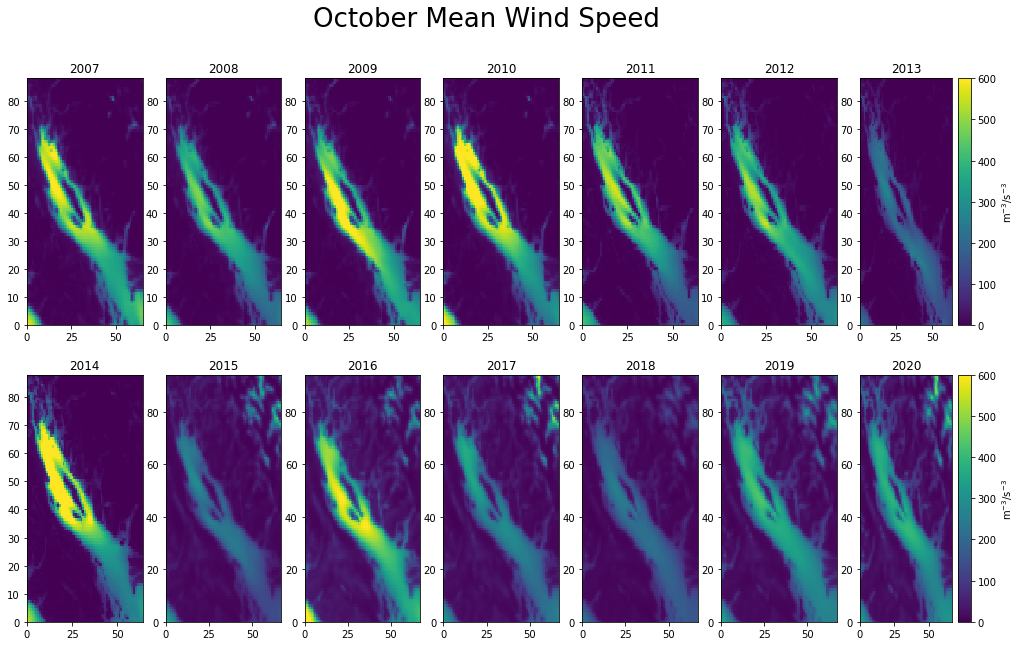

In [47]:
### October winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=600

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(oct_gl12007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(oct_gl12008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(oct_gl12009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(oct_gl12010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(oct_gl12011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(oct_gl22012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(oct_gl22013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(oct_gl22014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(oct_ops2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(oct_ops2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(oct_ops2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(oct_ops2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(oct_ops2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(oct_ops2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('October Mean Wind Speed',fontsize=26)

In [48]:
Oct2007=np.nanmean(oct_gl12007mean)
Oct2008=np.nanmean(oct_gl12008mean)
Oct2009=np.nanmean(oct_gl12009mean)
Oct2010=np.nanmean(oct_gl12010mean)
Oct2011=np.nanmean(oct_gl12011mean)
Oct2012=np.nanmean(oct_gl22012mean)
Oct2013=np.nanmean(oct_gl22013mean)
Oct2014=np.nanmean(oct_gl22014mean)
Oct2015=np.nanmean(oct_ops2015mean)
Oct2016=np.nanmean(oct_ops2016mean)
Oct2017=np.nanmean(oct_ops2017mean)
Oct2018=np.nanmean(oct_ops2018mean)
Oct2019=np.nanmean(oct_ops2019mean)
Oct2020=np.nanmean(oct_ops2020mean)

## November

In [49]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_gl12007=(fu**2+fv**2)**(3/2)
nov_gl12007mean=np.mean(nov_gl12007,0)


year=2008
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_gl12008=(fu**2+fv**2)**(3/2)
nov_gl12008mean=np.mean(nov_gl12008,0)


year=2009
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_gl12009=(fu**2+fv**2)**(3/2)
nov_gl12009mean=np.mean(nov_gl12009,0)


year=2010
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_gl12010=(fu**2+fv**2)**(3/2)
nov_gl12010mean=np.mean(nov_gl12010,0)


year=2011
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_gl12011=(fu**2+fv**2)**(3/2)
nov_gl12011mean=np.mean(nov_gl12011,0)


year=2012
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_gl22012=(fu**2+fv**2)**(3/2)
nov_gl22012mean=np.mean(nov_gl22012,0)


year=2013
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_gl22013=(fu**2+fv**2)**(3/2)
nov_gl22013mean=np.mean(nov_gl22013,0)


year=2014
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,18),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_gl22014=(fu**2+fv**2)**(3/2)
nov_gl22014mean=np.mean(nov_gl22014,0)


year=2015
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ops2015=(fu**2+fv**2)**(3/2)
nov_ops2015mean=np.mean(nov_ops2015,0)


year=2016
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ops2016=(fu**2+fv**2)**(3/2)
nov_ops2016mean=np.mean(nov_ops2016,0)


year=2017
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ops2017=(fu**2+fv**2)**(3/2)
nov_ops2017mean=np.mean(nov_ops2017,0)


year=2018
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ops2018=(fu**2+fv**2)**(3/2)
nov_ops2018mean=np.mean(nov_ops2018,0)


year=2019
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ops2019=(fu**2+fv**2)**(3/2)
nov_ops2019mean=np.mean(nov_ops2019,0)


year=2020
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ops2020=(fu**2+fv**2)**(3/2)
nov_ops2020mean=np.mean(nov_ops2020,0)

Text(0.5, 0.98, 'November Mean Wind Speed')

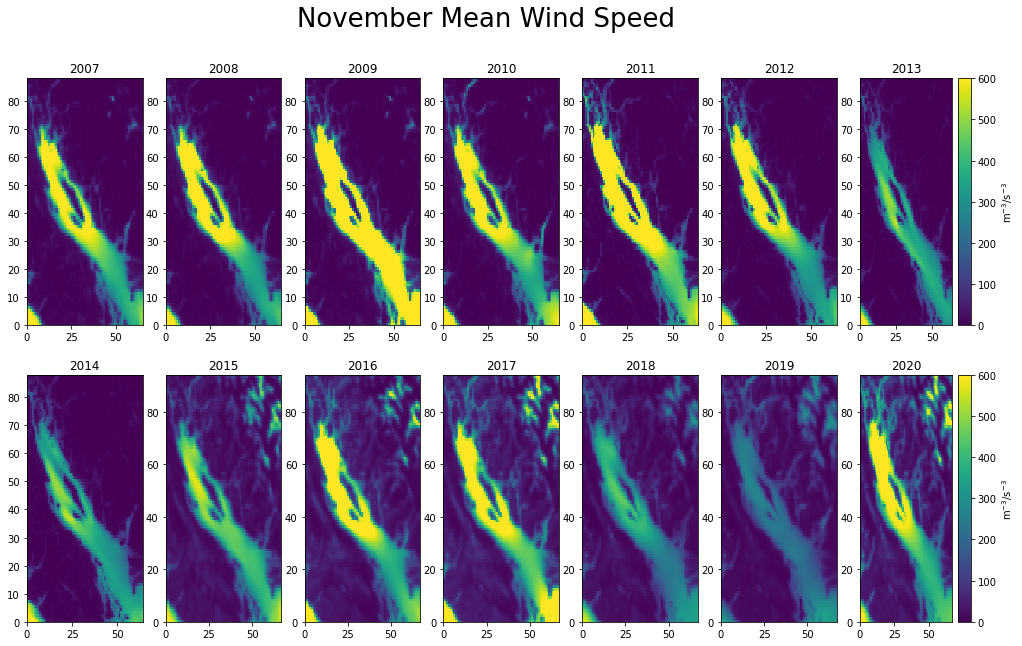

In [50]:
### November winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=600

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(nov_gl12007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(nov_gl12008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(nov_gl12009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(nov_gl12010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(nov_gl12011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(nov_gl22012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(nov_gl22013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(nov_gl22014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(nov_ops2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(nov_ops2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(nov_ops2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(nov_ops2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(nov_ops2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(nov_ops2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('November Mean Wind Speed',fontsize=26)

In [51]:
Nov2007=np.nanmean(nov_gl12007mean)
Nov2008=np.nanmean(nov_gl12008mean)
Nov2009=np.nanmean(nov_gl12009mean)
Nov2010=np.nanmean(nov_gl12010mean)
Nov2011=np.nanmean(nov_gl12011mean)
Nov2012=np.nanmean(nov_gl22012mean)
Nov2013=np.nanmean(nov_gl22013mean)
Nov2014=np.nanmean(nov_gl22014mean)
Nov2015=np.nanmean(nov_ops2015mean)
Nov2016=np.nanmean(nov_ops2016mean)
Nov2017=np.nanmean(nov_ops2017mean)
Nov2018=np.nanmean(nov_ops2018mean)
Nov2019=np.nanmean(nov_ops2019mean)
Nov2020=np.nanmean(nov_ops2020mean)

## December

In [52]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_gl12007=(fu**2+fv**2)**(3/2)
dec_gl12007mean=np.mean(dec_gl12007,0)


year=2008
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_gl12008=(fu**2+fv**2)**(3/2)
dec_gl12008mean=np.mean(dec_gl12008,0)


year=2009
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_gl12009=(fu**2+fv**2)**(3/2)
dec_gl12009mean=np.mean(dec_gl12009,0)


year=2010
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_gl12010=(fu**2+fv**2)**(3/2)
dec_gl12010mean=np.mean(dec_gl12010,0)


year=2011
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_gl12011=(fu**2+fv**2)**(3/2)
dec_gl12011mean=np.mean(dec_gl12011,0)


year=2012
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_gl22012=(fu**2+fv**2)**(3/2)
dec_gl22012mean=np.mean(dec_gl22012,0)


year=2013
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_gl22013=(fu**2+fv**2)**(3/2)
dec_gl22013mean=np.mean(dec_gl22013,0)


#year=2014
#day=dt.datetime(year,12,1)
#opsdir, namfmt, jlims, ilims = getWindVars(day)
#flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
#                           flen=1,ftype='None',tres=24);
#fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
#fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
#fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
#dec_ops2014=(fu**2+fv**2)**(3/2)
#dec_ops2014mean=np.mean(dec_ops2014,0)


year=2015
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ops2015=(fu**2+fv**2)**(3/2)
dec_ops2015mean=np.mean(dec_ops2015,0)


year=2016
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ops2016=(fu**2+fv**2)**(3/2)
dec_ops2016mean=np.mean(dec_ops2016,0)


year=2017
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ops2017=(fu**2+fv**2)**(3/2)
dec_ops2017mean=np.mean(dec_ops2017,0)


year=2018
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ops2018=(fu**2+fv**2)**(3/2)
dec_ops2018mean=np.mean(dec_ops2018,0)


year=2019
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ops2019=(fu**2+fv**2)**(3/2)
dec_ops2019mean=np.mean(dec_ops2019,0)


year=2020
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ops2020=(fu**2+fv**2)**(3/2)
dec_ops2020mean=np.mean(dec_ops2020,0)

Text(0.5, 0.98, 'December Mean Wind Speed')

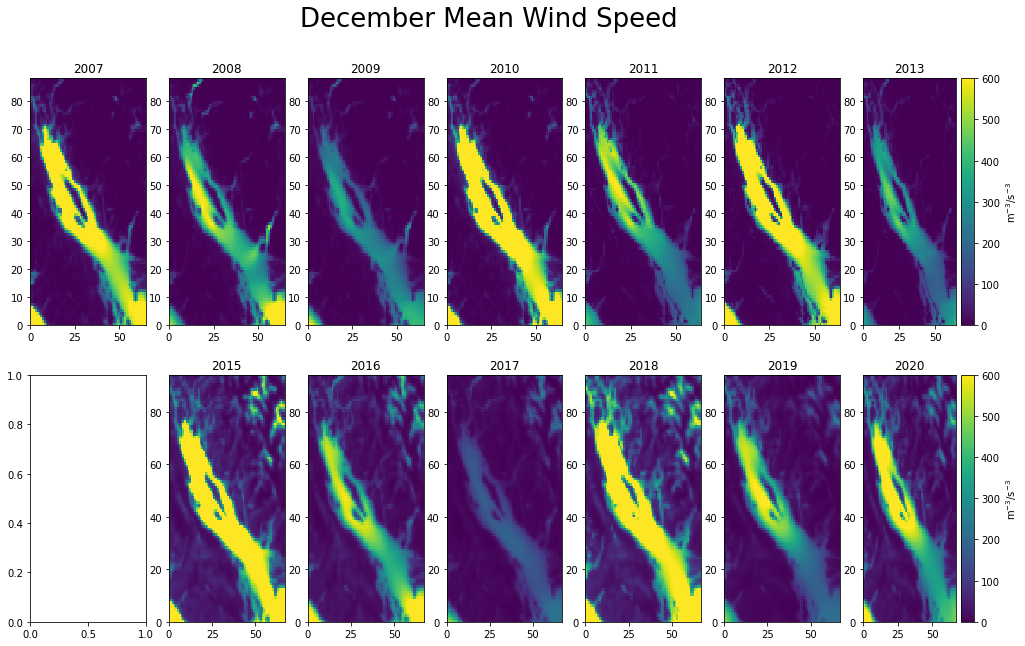

In [53]:
### December winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=600

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(dec_gl12007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(dec_gl12008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(dec_gl12009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(dec_gl12010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(dec_gl12011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(dec_gl22012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(dec_gl22013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
#iax=ax[1,0]
#iax.set_title('2014')
#m=iax.pcolormesh(dec_gl22014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(dec_ops2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(dec_ops2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(dec_ops2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(dec_ops2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(dec_ops2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(dec_ops2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('December Mean Wind Speed',fontsize=26)

In [54]:
Dec2007=np.nanmean(dec_gl12007mean)
Dec2008=np.nanmean(dec_gl12008mean)
Dec2009=np.nanmean(dec_gl12009mean)
Dec2010=np.nanmean(dec_gl12010mean)
Dec2011=np.nanmean(dec_gl12011mean)
Dec2012=np.nanmean(dec_gl22012mean)
Dec2013=np.nanmean(dec_gl22013mean)
#Dec2014=np.nanmean(dec_gl22014mean)
Dec2015=np.nanmean(dec_ops2015mean)
Dec2016=np.nanmean(dec_ops2016mean)
Dec2017=np.nanmean(dec_ops2017mean)
Dec2018=np.nanmean(dec_ops2018mean)
Dec2019=np.nanmean(dec_ops2019mean)
Dec2020=np.nanmean(dec_ops2020mean)

In [55]:
Jan_W=(Jan2017+Jan2018+Jan2019+Jan2020)/4
Feb_W=(Feb2017+Feb2018+Feb2019+Jan2020)/4
Mar_W=(Mar2017+Mar2018+Mar2019+Mar2020)/4
Apr_W=(Apr2017+Apr2018+Apr2019+Apr2020)/4
May_W=(May2017+May2018+May2019+May2020)/4
Jun_W=(Jun2017+Jun2018+Jun2019+Jun2020)/4
Jul_W=(Jul2017+Jul2018+Jul2019+Jul2020)/4
Aug_W=(Aug2017+Aug2018+Aug2019+Aug2020)/4
Sep_W=(Sep2017+Sep2018+Sep2019+Sep2020)/4
Oct_W=(Oct2017+Oct2018+Oct2019+Oct2020)/4
Nov_W=(Nov2017+Nov2018+Nov2019+Nov2020)/4
Dec_W=(Dec2017+Dec2018+Dec2019+Dec2020)/4

In [56]:
Jan_C=(Jan2008+Jan2010+Jan2011+Jan2012)/4
Feb_C=(Feb2008+Feb2010+Feb2011+Jan2012)/4
Mar_C=(Mar2008+Mar2010+Mar2011+Mar2012)/4
Apr_C=(Apr2008+Apr2010+Apr2011+Apr2012)/4
May_C=(May2008+May2010+May2011+May2012)/4
Jun_C=(Jun2008+Jun2010+Jun2011+Jun2012)/4
Jul_C=(Jul2008+Jul2010+Jul2011+Jul2012)/4
Aug_C=(Aug2008+Aug2010+Aug2011+Aug2012)/4
Sep_C=(Sep2008+Sep2010+Sep2011+Sep2012)/4
Oct_C=(Oct2008+Oct2010+Oct2011+Oct2012)/4
Nov_C=(Nov2008+Nov2010+Nov2011+Nov2012)/4
Dec_C=(Dec2008+Dec2010+Dec2011+Dec2012)/4

In [57]:
print(Jan_C,Feb_C, Mar_C, Apr_C,May_C,\
      Jun_C, Jul_C,Aug_C,Sep_C,Oct_C,\
     Nov_C,Dec_C)

123.16204833984375 101.51404571533203 122.18372344970703 72.37696075439453 54.93415832519531 46.738704681396484 50.76932907104492 41.89295959472656 54.69990539550781 77.25642395019531 119.45597839355469 121.62440490722656


In [58]:
print(Jan_W,Feb_W, Mar_W, Apr_W,May_W,\
      Jun_W,Jul_W,Aug_W,Sep_W,Oct_W,\
     Nov_W,Dec_W)

162.92666625976562 134.08203125 73.88327026367188 75.76962280273438 40.46176528930664 48.719791412353516 36.74886703491211 38.1739501953125 55.095863342285156 83.51316833496094 128.96656799316406 130.51129150390625


Text(0, 0.5, 'm$^{-3}$/s$^{-3}$')

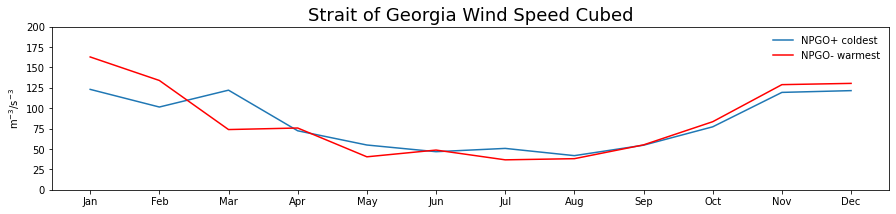

In [59]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
y=[Jan_C,Feb_C,Mar_C,Apr_C,May_C,Jun_C,Jul_C,Aug_C,Sep_C,Oct_C,Nov_C,Dec_C]
y2=[Jan_W,Feb_W,Mar_W,Apr_W,May_W,Jun_W,Jul_W,Aug_W,Sep_W,Oct_W,Nov_W,Dec_W]

ax.plot(x, y,label='NPGO+ coldest')
ax.plot(x, y2,label='NPGO- warmest',color='r')

ax.set_title('Strait of Georgia Wind Speed Cubed',fontsize=18)
ax.legend(frameon=False)
ax.set_ylim(0,200)
ax.set_ylabel('m$^{-3}$/s$^{-3}$')